# Exploratory Data Analysis for Text Data-Tokopedia Laptop Sleeve Reviews
Data Analyst: Yogga Prastya Wijaya

**[LinkedIn Profile](https://www.linkedin.com/in/yogga-prastya-wijaya/)** | **[GitHub](https://github.com/YoggaPrastyaWijaya)**
### ABOUT ME

Welcome! I am a Certified Data Scientist and Data Analyst with extensive training from Purwadhika Digital Technology School and DataCamp. My advanced skills in Python, SQL, Google Sheets, Excel, Tableau, and Google Looker empower me to extract actionable insights from large datasets and develop cutting-edge machine learning models. Coupled with a business degree from Universitas Prasetiya Mulya and hands-on experience as a relationship manager, I bring a unique blend of business acumen and technical expertise to every analysis, driving meaningful improvements and growth.

This project is a key part of my role as a Product Analyst at Anyara, a small business I founded specializing in corporate souvenirs.

### TABLEAU
**[TABLEAU DASHBOARD](https://public.tableau.com/app/profile/yogga.prastya.wijaya/viz/TokopediaLaptopSleeveCompetitorAnalysis/Dashboard1?publish=yes)**


# BACKGROUND

Anyara is a company that specializes in providing souvenirs for both personal use and corporate or wedding events. Currently, Anyara is planning to expand its product line by introducing a new item—laptop sleeves. To ensure the success of this new product, Anyara intends to conduct market research through Tokopedia, one of Indonesia's leading e-commerce platforms.

**Problem Statements**

How can Anyara create a competitively priced laptop sleeve that meets popular design preferences and addresses key consumer feedback in Indonesia's e-commerce market?

**Goals**

The objectives of this analysis are to:

1. Understand Market Dynamics: Analyze how pricing affects market share among top merchants.
2. Identify Optimal Pricing: Determine the optimal price range for maximizing market share.
3. Uncover Key Selling Points: Explore product descriptions to identify attributes that resonate most with customers.
4. Enhance Customer Satisfaction: Analyze customer reviews to pinpoint key aspects that influence customer satisfaction and purchasing decisions.

**Analytic Approach**

The approach involves collecting data on all laptop sleeve products available on Tokopedia, cleaning and preprocessing the data, analyzing it to uncover insights, and providing actionable recommendations based on the analysis.

Through this analysis, we aim to gain valuable insights that will guide the development of Anyara’s laptop sleeve product, ensuring it meets market demands and stands out in the competitive landscape.

# DATA UNDERSTANDING

Dataset Source: Tokopedia.com

Note:
1. The data was collected through web scraping on August 30th, 2024.

2. The data was filtered using the following criteria:

- Keyword: Laptop Sleeve
- Price Range: Rp50,000 - Rp500,000
- Location: Jabodetabek
- Ratings: Above 4.5
  
These filters were applied to ensure the insights are valuable and relevant for product development.

**Attribute Information**

| **Variable Name**    | **Description**                           |
|----------------------|-------------------------------------------|
| `product_name`       | Product headline name                     |
| `avg_rating`         | Average rating of the product             |
| `num_ratings`        | Total number of ratings received          |
| `price`              | Price of the product                      |
| `merchant_name`      | Name of the merchant                      |
| `description`        | Product description                       |
| `merchant_location`  | Location of the merchant                  |
| `total_sold`         | Total units of the product sold           |
| `customer_ratings`   | List of customer ratings                  |
| `customer_reviews`   | List of customer reviews                  |


In [1]:
#Library

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import json

import re
from string import punctuation

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')


from deep_translator import GoogleTranslator

from nltk.stem import SnowballStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yogga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yogga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Load Dataset
df = pd.read_csv("tokopedia_scrap_data.csv")
df.head()

,Unnamed: 0,product_name,avg_rating,num_ratings,price,merchant_name,description,merchant_location,total_sold,customer_ratings,customer_reviews
0,0,"! LAPTOP SLEEVE WIWU PILOT 13""/14""/13.3""/15.4""...",5.0,(1 rating),Rp292.000,SLK COMPUTER,SELAMAT DATANG DITOKO KAMI \n\nSelamat datang ...,Jakarta Barat,Terjual 2,[],[]
1,1,(100% ORIGINAL) Vans Padded Laptop Sleeve Pouc...,5.0,(1 rating),Rp499.000,Travel Essentials,Dapatkan CASHBACK & FREE ONGKIR dengan berbela...,Jakarta Pusat,Terjual 1,"[],[]","[],[]"
2,2,(FREE TAS MOUSE)Tas Sarung Laptop Multifungsi ...,5.0,(3 rating),Rp80.000,Miracle Macbook,Tas Sarung Laptop Multifungsi Softcase Macbook...,Jakarta Barat,Terjual 4,"[{""rating"":"""",""rating-aria-label"":""bintang 5""}...","[{""review"":""puas belanja disini. untuk pengiri..."
3,3,(MC02) LAPTOP SLEEVE /TAS PELINDUNG IPAD TABLE...,5.0,(1 rating),Rp119.900,Joline Official,✨LAPTOP SLEEVE ✨\n\n❗️ Deskripsi Produk ❗️\nSl...,Jakarta Utara,Terjual 1,[],[]
4,4,"12,5"" Softcase Tas Sleeve Neoprene Busa Laptop...",5.0,(2 rating),Rp59.900,Evelyn28 Shop,"12,5"" Softcase Tas Sleeve Neoprene Busa Laptop...",Jakarta Barat,Terjual 4,"[{""rating"":"""",""rating-aria-label"":""bintang 5""}]","[{""review"":""Barang oke, packing rapi, pengirim..."


In [3]:
# Data type info and numer of items for reach column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3197 non-null   int64  
 1   product_name       3197 non-null   object 
 2   avg_rating         3197 non-null   float64
 3   num_ratings        3197 non-null   object 
 4   price              3197 non-null   object 
 5   merchant_name      3197 non-null   object 
 6   description        3197 non-null   object 
 7   merchant_location  3197 non-null   object 
 8   total_sold         3197 non-null   object 
 9   customer_ratings   3197 non-null   object 
 10  customer_reviews   3197 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 274.9+ KB


# DATA CLEANING AND PREPROCESSING

In [4]:
np.random.seed(2)
listItem = []
for col in df.columns:
    listItem.append([col,
                   df[col].dtype,
                    df[col].isna().sum(),
                    round((df[col].isna().sum()/len(df[col]))*100,2),
                    df[col].nunique(),
                    list(df[col].drop_duplicates().sample(2).values)])
dfDesc = pd.DataFrame(columns=['dataFeatures','dataType','null','nullPct','nUnique','sample'], data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,nUnique,sample
0,Unnamed: 0,int64,0,0.0,3197,"[3148, 1672]"
1,product_name,object,0,0.0,3114,[2in1 Invisible Laptop Stand Standing Holder F...
2,avg_rating,float64,0,0.0,13,"[4.5, 4.3]"
3,num_ratings,object,0,0.0,250,"[(77 rating), (73 rating)]"
4,price,object,0,0.0,578,"[Rp234.000, Rp292.000]"
5,merchant_name,object,0,0.0,691,"[manukashop_id, Navy Shops]"
6,description,object,0,0.0,2546,[Selamat datang di PEPPERBOX\nPRODUK READY STO...
7,merchant_location,object,0,0.0,14,"[Kota Bekasi, Jakarta Barat]"
8,total_sold,object,0,0.0,44,"[Terjual 11, Terjual 750+]"
9,customer_ratings,object,0,0.0,603,"[[{""rating"":"""",""rating-aria-label"":""bintang 5""..."


**1. Removing the CustomerID Column**

The `CustomerID` column is not needed in the analysis and modeling stages because it only contains unique IDs that distinguish each customer.

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

**2. Handling Numerical Data Consistency**

The columns `total_sold`, `price`, and `num_ratings` should be numeric data types for effective analysis. However, these columns are currently stored as object data types because they contain string formats. To ensure accurate data analysis, we need to remove any non-numeric characters from these columns and convert the data to appropriate numeric types.

In [6]:
df["total_sold"]=df["total_sold"].str.replace(" rb","000")
df["total_sold"]=df["total_sold"].str.replace("Terjual ","")
df["total_sold"]=df["total_sold"].str.replace("+","")
df["total_sold"]=df["total_sold"].astype(int)

df["price"]=df["price"].str.replace("Rp","")
df["price"]=df["price"].str.replace(".","")
df["price"]=df["price"].astype(int)

df["num_ratings"]=df["num_ratings"].str.replace("(","")
df["num_ratings"]=df["num_ratings"].str.replace(" rating)","")
df["num_ratings"]=df["num_ratings"].str.replace(".","")
df["num_ratings"]=df["num_ratings"].astype(int)
df.head()

,product_name,avg_rating,num_ratings,price,merchant_name,description,merchant_location,total_sold,customer_ratings,customer_reviews
0,"! LAPTOP SLEEVE WIWU PILOT 13""/14""/13.3""/15.4""...",5.0,1,292000,SLK COMPUTER,SELAMAT DATANG DITOKO KAMI \n\nSelamat datang ...,Jakarta Barat,2,[],[]
1,(100% ORIGINAL) Vans Padded Laptop Sleeve Pouc...,5.0,1,499000,Travel Essentials,Dapatkan CASHBACK & FREE ONGKIR dengan berbela...,Jakarta Pusat,1,"[],[]","[],[]"
2,(FREE TAS MOUSE)Tas Sarung Laptop Multifungsi ...,5.0,3,80000,Miracle Macbook,Tas Sarung Laptop Multifungsi Softcase Macbook...,Jakarta Barat,4,"[{""rating"":"""",""rating-aria-label"":""bintang 5""}...","[{""review"":""puas belanja disini. untuk pengiri..."
3,(MC02) LAPTOP SLEEVE /TAS PELINDUNG IPAD TABLE...,5.0,1,119900,Joline Official,✨LAPTOP SLEEVE ✨\n\n❗️ Deskripsi Produk ❗️\nSl...,Jakarta Utara,1,[],[]
4,"12,5"" Softcase Tas Sleeve Neoprene Busa Laptop...",5.0,2,59900,Evelyn28 Shop,"12,5"" Softcase Tas Sleeve Neoprene Busa Laptop...",Jakarta Barat,4,"[{""rating"":"""",""rating-aria-label"":""bintang 5""}]","[{""review"":""Barang oke, packing rapi, pengirim..."


**3. Handling JSON Format**

The `customer_ratings` and `customer_reviews` columns contain lists of JSON format, with each element in one list corresponding to an element in the other. To facilitate further analysis, we need to transform these JSON values into a more accessible format, such as separate lists or data structures. This will allow us to perform detailed analysis on the ratings and reviews data.

In [7]:
def rating_extract(data, key):
    # Fix the format by enclosing the entire string in square brackets
    fixed_rating_data = f'[{data}]'
    # Parse the fixed JSON string
    nested_rating_list = json.loads(fixed_rating_data)
    # Flatten the list of lists into a single list
    flattened_rating_list = [item for sublist in nested_rating_list for item in sublist]
    # Extract "bintang 5" from each dictionary
    extracted_ratings = [item.get(key) for item in flattened_rating_list]    
    # Display the extracted ratings
    return extracted_ratings

df["customer_ratings"] = df["customer_ratings"].apply(lambda x: rating_extract(x,'rating-aria-label'))
df["customer_reviews"] = df["customer_reviews"].apply(lambda x: rating_extract(x,'review'))
df.head()

,product_name,avg_rating,num_ratings,price,merchant_name,description,merchant_location,total_sold,customer_ratings,customer_reviews
0,"! LAPTOP SLEEVE WIWU PILOT 13""/14""/13.3""/15.4""...",5.0,1,292000,SLK COMPUTER,SELAMAT DATANG DITOKO KAMI \n\nSelamat datang ...,Jakarta Barat,2,[],[]
1,(100% ORIGINAL) Vans Padded Laptop Sleeve Pouc...,5.0,1,499000,Travel Essentials,Dapatkan CASHBACK & FREE ONGKIR dengan berbela...,Jakarta Pusat,1,[],[]
2,(FREE TAS MOUSE)Tas Sarung Laptop Multifungsi ...,5.0,3,80000,Miracle Macbook,Tas Sarung Laptop Multifungsi Softcase Macbook...,Jakarta Barat,4,"[bintang 5, bintang 5]",[puas belanja disini. untuk pengiriman cepat s...
3,(MC02) LAPTOP SLEEVE /TAS PELINDUNG IPAD TABLE...,5.0,1,119900,Joline Official,✨LAPTOP SLEEVE ✨\n\n❗️ Deskripsi Produk ❗️\nSl...,Jakarta Utara,1,[],[]
4,"12,5"" Softcase Tas Sleeve Neoprene Busa Laptop...",5.0,2,59900,Evelyn28 Shop,"12,5"" Softcase Tas Sleeve Neoprene Busa Laptop...",Jakarta Barat,4,[bintang 5],"[Barang oke, packing rapi, pengiriman cepat. s..."


**4. Text Preprocessing**

The `description` column contains text values with inconsistent formatting and unnecessary information, which can negatively impact the analysis. To improve the quality of the data and obtain better results, we need to clean and standardize the text data. 

First, we will translate the description if the description contains any english word to indonesian.

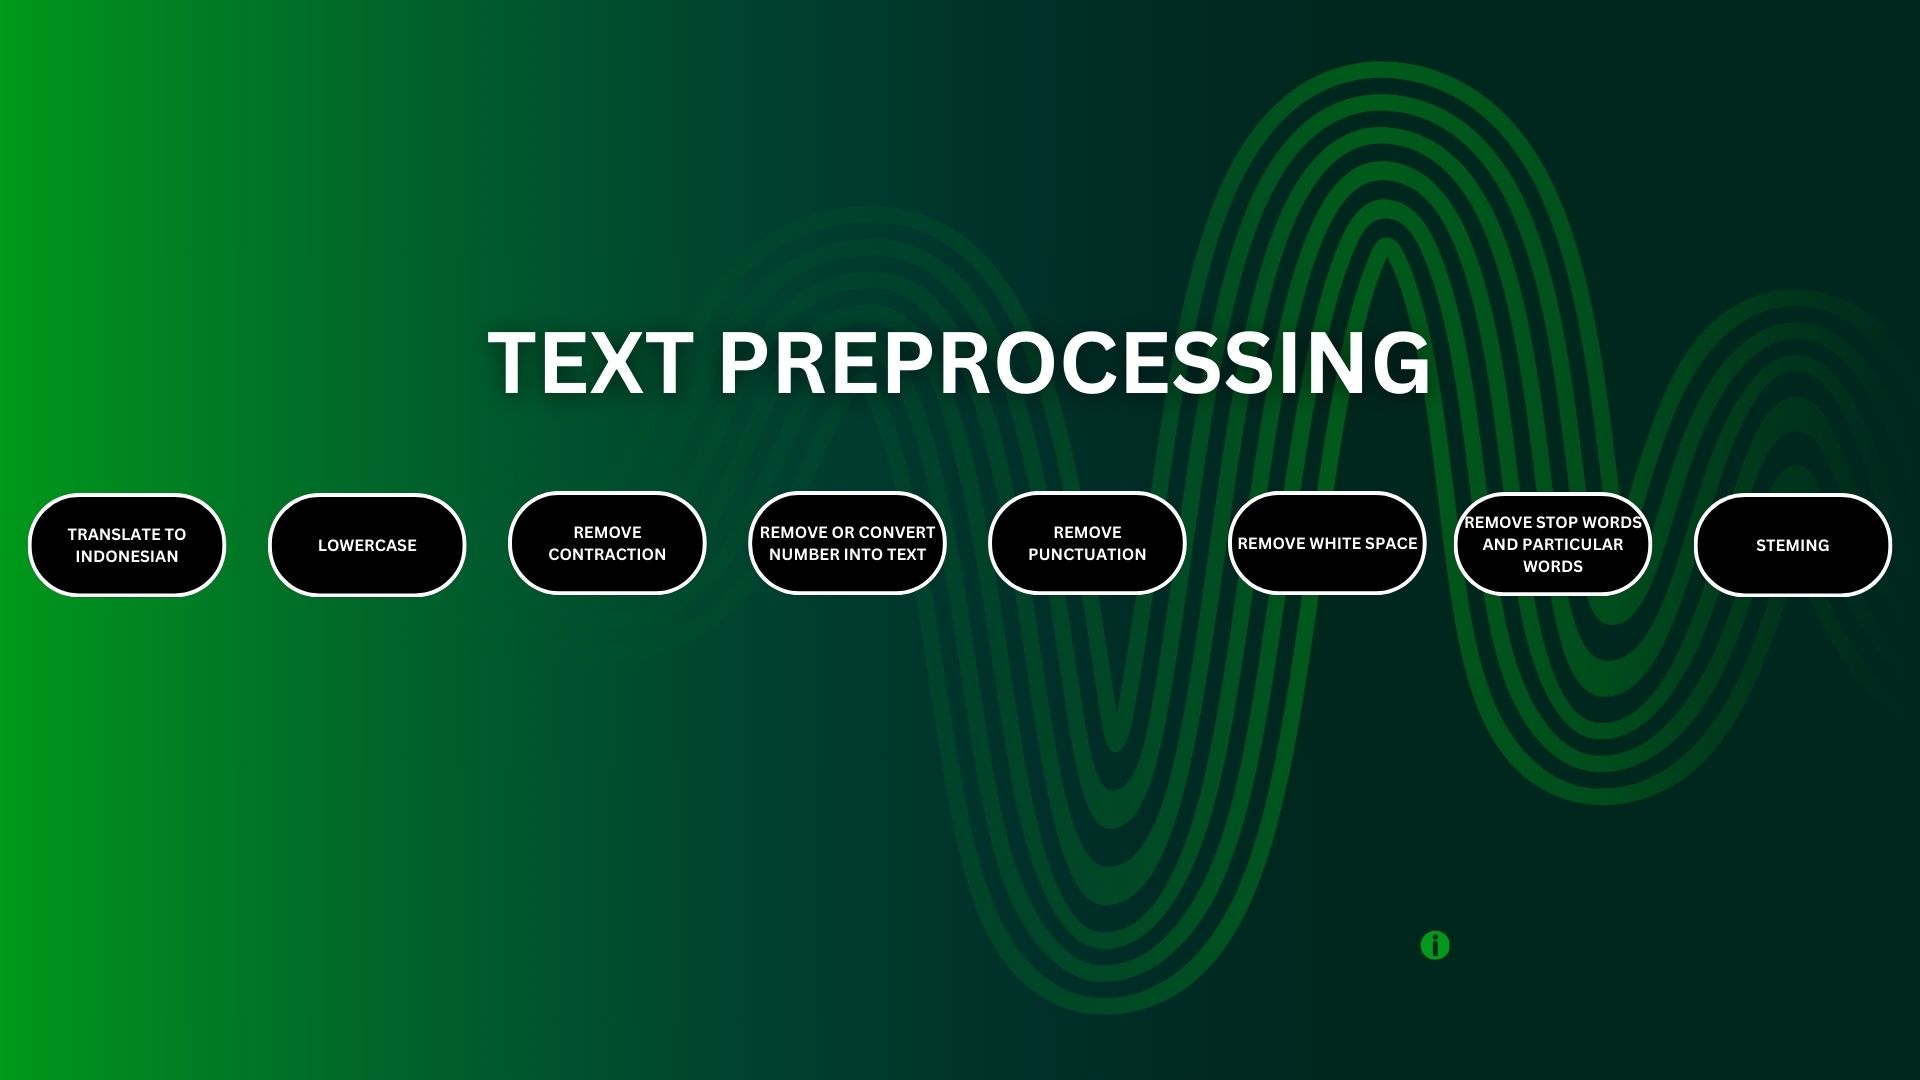

In [8]:
# Function to translate text from English to Indonesian
def translate_to_indonesian(text):
    translator = GoogleTranslator(source='en', target='id')
    return translator.translate(text)


# Perform translation
df["description_ind"] = df['description'].apply(translate_to_indonesian)

Then we will create a function called `to_lower` that converts all text to lowercase.

In [9]:
def to_lower(text):
    return text.lower()

The remove_numbeers function remove any numerical character in the description

In [11]:
def remove_numbers(text):
    output=''.join(c for c in text if not c.isdigit())
    return output

The remove_punct function remove any punctuation character in the description

In [12]:
def remove_punct(text):
    output=''.join(c for c in text if c not in punctuation)
    return output

The remove_white_space function remove any white space in the description

In [13]:
def remove_white_space(text):
    output=' '.join(text.split())
    return output

The remove_stopwords_ind function remove any indonesian stopwords in the description

In [14]:
def remove_stopwords_ind(text):
    stop_words=stopwords.words('indonesian')
    output=' '.join([c for c in nltk.word_tokenize(text) if not c in stop_words])
    return output

The stem_ind function remove reduces words from description to their base or root form, stripping off prefixes or suffixes to standardize variations of a word.

In [15]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_ind(text):
    stop_words=stopwords.words('indonesian')
    stemmed_word =[stemmer.stem(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return ' '.join(stemmed_word)

Then we run all of the function

In [98]:
#to lowercase
df['description1']=df['description_ind'].apply(to_lower)

#remove number
df['description2']=df['description1'].apply(remove_numbers)

#remove punct
df['description3']=df['description2'].apply(remove_punct)

#remove ws
df['description4']=df['description3'].apply(remove_white_space)

#remove sw indonesian
df['description5']=df['description4'].apply(remove_stopwords_ind)

#stemming indonesian
df['description_stem']=df['description5'].apply(stem_ind)

df.head()

,product_name,avg_rating,num_ratings,price,merchant_name,description,merchant_location,total_sold,customer_ratings,customer_reviews,description_ind,description1,description2,description3,description4,description5,description6,description_stem,clean_description_stem
0,"! LAPTOP SLEEVE WIWU PILOT 13""/14""/13.3""/15.4""...",5.0,1,292000,SLK COMPUTER,SELAMAT DATANG DITOKO KAMI \n\nSelamat datang ...,Jakarta Barat,2,[],[],SELAMAT DATANG DITOKO KAMI Selamat datang 🎉 Pa...,selamat datang ditoko kami selamat datang 🎉 pa...,selamat datang ditoko kami selamat datang 🎉 pa...,selamat datang ditoko kami selamat datang 🎉 pa...,selamat datang ditoko kami selamat datang 🎉 pa...,selamat datang ditoko kami selamat datang 🎉 pa...,selamat ditoko selamat 🎉 pastikan varian produ...,selamat toko selamat pasti varian produk beli...,selahmat diatadang diitoko ami selahmat diatad...
1,(100% ORIGINAL) Vans Padded Laptop Sleeve Pouc...,5.0,1,499000,Travel Essentials,Dapatkan CASHBACK & FREE ONGKIR dengan berbela...,Jakarta Pusat,1,[],[],Dapatkan CASHBACK & GRATIS ONGKIR dengan berbe...,dapatkan cashback & gratis ongkir dengan berbe...,dapatkan cashback & gratis ongkir dengan berbe...,dapatkan cashback & gratis ongkir dengan berbe...,dapatkan cashback gratis ongkir dengan berbel...,dapatkan cashback gratis ongkir dengan berbela...,dapatkan cashback gratis ongkir berbelanja tok...,dapat cashback gratis ongkir belanja toko trav...,diapaatkeadan cashbacke gede rasaatis ongkos k...
2,(FREE TAS MOUSE)Tas Sarung Laptop Multifungsi ...,5.0,3,80000,Miracle Macbook,Tas Sarung Laptop Multifungsi Softcase Macbook...,Jakarta Barat,4,"[bintang 5, bintang 5]",[puas belanja disini. untuk pengiriman cepat s...,Tas Laptop Multifungsi Sarung Softcase Macbook...,tas laptop multifungsi sarung softcase macbook...,tas laptop multifungsi sarung softcase macbook...,tas laptop multifungsi sarung softcase macbook...,tas laptop multifungsi sarung softcase macbook...,tas laptop multifungsi sarung softcase macbook...,tas laptop multifungsi sarung softcase macbook...,tas laptop multifungsi sarung softcase macbook...,tas lahptop mkamultifkamudangsi sabarudang sof...
3,(MC02) LAPTOP SLEEVE /TAS PELINDUNG IPAD TABLE...,5.0,1,119900,Joline Official,✨LAPTOP SLEEVE ✨\n\n❗️ Deskripsi Produk ❗️\nSl...,Jakarta Utara,1,[],[],✨LAPTOP SLEEVE ✨ ❗️ Deskripsi Produk ❗️ Sleeve...,✨laptop sleeve ✨ ❗️ deskripsi produk ❗️ sleeve...,✨laptop sleeve ✨ ❗️ deskripsi produk ❗️ sleeve...,✨laptop sleeve ✨ ❗️ deskripsi produk ❗️ sleeve...,✨laptop sleeve ✨ ❗️ deskripsi produk ❗️ sleeve...,✨laptop sleeve ✨ ❗️ deskripsi produk ❗️ sleeve...,✨laptop sleeve ✨ ❗️ deskripsi produk ❗️ sleeve...,laptop sleeve deskripsi produk sleeve gamba...,lahptop dieskeripsi profesionaldikamuke b...
4,"12,5"" Softcase Tas Sleeve Neoprene Busa Laptop...",5.0,2,59900,Evelyn28 Shop,"12,5"" Softcase Tas Sleeve Neoprene Busa Laptop...",Jakarta Barat,4,[bintang 5],"[Barang oke, packing rapi, pengiriman cepat. s...","12,5"" Softcase Tas Sleeve Neoprene Busa Laptop...","12,5"" softcase tas sleeve neoprene busa laptop...","12,5"" softcase tas sleeve neoprene busa laptop...",","" softcase tas sleeve neoprene busa laptop ma...",softcase tas sleeve neoprene busa laptop macb...,softcase tas sleeve neoprene busa laptop macbo...,softcase tas sleeve neoprene busa laptop macbo...,softcase tas sleeve neoprene busa laptop macbo...,soft daneopreplydane bkamusa lahptop macobaook...


Now we got the stem version of description column. Now we try to do an explanatory data analysis and text exploration

# EXPLORATORY DATA ANALYSIS & TEXT EXPLORATION

**1. Quadrant Competitive Landscape Analysis: Market Share vs Average Price**

In this section, we will analyze the competitive landscape of laptop sleeve products on Tokopedia by examining market share and average price. Using the data we've gathered, we will calculate each merchant's market share and average price, and then visualize the market landscape with a scatter plot showing market share versus average price.

Market share is determined by calculating each merchant's average revenue, divided by the total average market revenue on Tokopedia.

In [99]:
result = df.groupby("merchant_name")[["total_sold", "price"]].agg({"total_sold": "sum", "price": [len, min, max, np.mean]})
result.columns = ['total_sold_sum', 'n_product','merchant_price_min', 'merchant_price_max', "merchant_price_avg"]  # Flatten the MultiIndex to single-level columns
result["avg_revenue"] = result["total_sold_sum"]*result["merchant_price_avg"]
result["market_share"] = round((result["avg_revenue"]/sum(result["avg_revenue"]))*100,2)
# If you want to explicitly apply it just to the 'avg_revenue' column:
result["avg_revenue_clear"] = result["avg_revenue"].apply(lambda x: format(x, ',.2f'))

result.sort_values("market_share", ascending=False,inplace=True)
display(result.head(5))
display(result.describe())

,total_sold_sum,n_product,merchant_price_min,merchant_price_max,merchant_price_avg,avg_revenue,market_share,avg_revenue_clear
merchant_name,,,,,,,,
24HoursShop,6540,16,60000,275000,172187.500000,1.126106e+09,5.26,"1,126,106,250.00"
DBR Premium,7082,10,59900,299900,133900.000000,9.482798e+08,4.43,"948,279,800.00"
gudanggadget14,7971,129,55000,239000,108383.720930,8.639266e+08,4.03,"863,926,639.53"
ORIGINALproducts JAKARTA,4561,23,75000,295000,181630.434783,8.284164e+08,3.87,"828,416,413.04"
KINGBAG OFFICIAL STORE,4555,15,75000,265000,150200.000000,6.841610e+08,3.19,"684,161,000.00"


,total_sold_sum,n_product,merchant_price_min,merchant_price_max,merchant_price_avg,avg_revenue,market_share
count,691.000000,691.000000,691.000000,691.000000,691.000000,6.910000e+02,691.000000
mean,227.136035,4.626628,139914.723589,171246.648336,153759.582486,3.100046e+07,0.144313
std,819.655703,16.026774,101937.439263,117887.515225,105733.202397,1.076634e+08,0.502737
min,1.000000,1.000000,47895.000000,50000.000000,50000.000000,5.000000e+04,0.000000
25%,2.000000,1.000000,66684.500000,84792.000000,77826.000000,3.064000e+05,0.000000
50%,12.000000,1.000000,99000.000000,132955.000000,118000.000000,1.482300e+06,0.010000
75%,71.000000,3.000000,178100.000000,205000.000000,188050.000000,9.062500e+06,0.040000
max,7971.000000,183.000000,500000.000000,524000.000000,500000.000000,1.126106e+09,5.260000


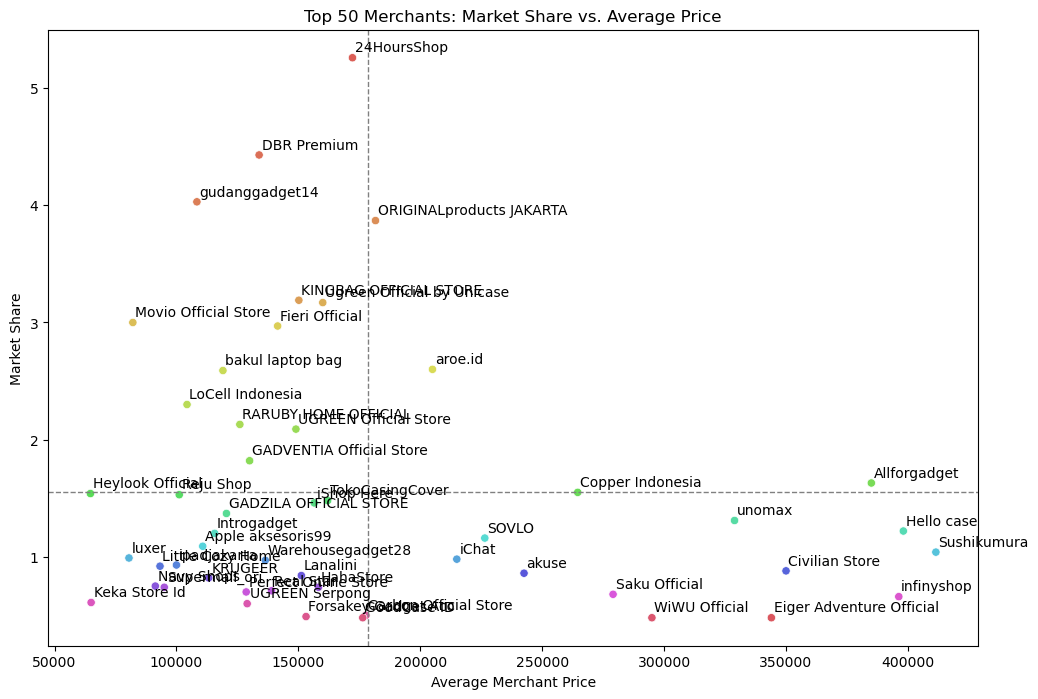

In [100]:
# Assume 'result' contains the necessary columns including 'market_share' and 'merchant_price_avg'
top_50 = result[:50]

plt.figure(figsize=(12,8))
# Create scatter plot
sns.scatterplot(data=top_50, x="merchant_price_avg", y="market_share", hue=top_50.index, legend=False, palette="hls")

# Add labels for each point with smaller text size
for i in range(len(top_50)):
    plt.text(x=top_50["merchant_price_avg"].iloc[i]+ 1000, 
             y=top_50["market_share"].iloc[i]+0.05, 
             s=top_50.index[i], 
             ha='left', 
             fontsize=10)  # Adjust fontsize to make text smaller

# Add middle x and y axis lines
plt.axhline(y=top_50["market_share"].mean(), color='gray', linestyle='--', linewidth=1)
plt.axvline(x=top_50["merchant_price_avg"].mean(), color='gray', linestyle='--', linewidth=1)

# Labels and title
plt.xlabel("Average Merchant Price")
plt.ylabel("Market Share")
plt.title("Top 50 Merchants: Market Share vs. Average Price")

# Show plot
plt.show()


This chart is also available on my Tableau dashboard. Click here: **[TABLEAU DASHBOARD](https://public.tableau.com/app/profile/yogga.prastya.wijaya/viz/TokopediaLaptopSleeveCompetitorAnalysis/Dashboard1?publish=yes)**

In [101]:
top_50["market_share"].mean()

1.5568

In [102]:
top_50["merchant_price_avg"].mean()

178380.4255050097

💡**Findings**💡

Based on the market share versus average merchant price matrix for the top 50 merchants, we observed several significant trends:

1. Average Merchant Price:

- The average price of products among merchants is 178,380. This figure serves as a crucial benchmark for understanding how price influences market share.

2. Impact of Price on Market Share:

- Merchants with Prices Above the Average:
Merchants with an average product price above 178,380 tend to have their market share capped at approximately 1.55%. This suggests that higher-priced products may struggle to capture a larger market share. This could be due to limited consumer purchasing power or a preference for more affordable options.

- Merchants with Prices Below the Average:
Conversely, merchants with an average product price below 178,380 often enjoy a higher market share compared to the 1.55% threshold. Lower prices enable them to attract more customers and increase their market presence. This indicates that more affordable products may have broader appeal among consumers.

3. Strategic Implications for Pricing:

- For Merchants with Above-Average Prices: Reevaluate pricing strategy and consider enhancing the perceived value of your products. Emphasizing product quality, unique features, or superior value can help justify higher prices and attract more customers despite the higher cost.
- For Merchants with Below-Average Prices: Explore opportunities to add value to your products or differentiate from competitors while maintaining competitive pricing. This approach can help capture a larger market share without sacrificing affordability.

-----

**2. Price Analysis**

In this section, we aim to determine the market price range for "laptop sleeves" on Tokopedia. We'll plot the average price for each merchant along with the overall market average using a range plot. This will help identify the optimal price point or "sweet spot" for setting competitive prices in the market.

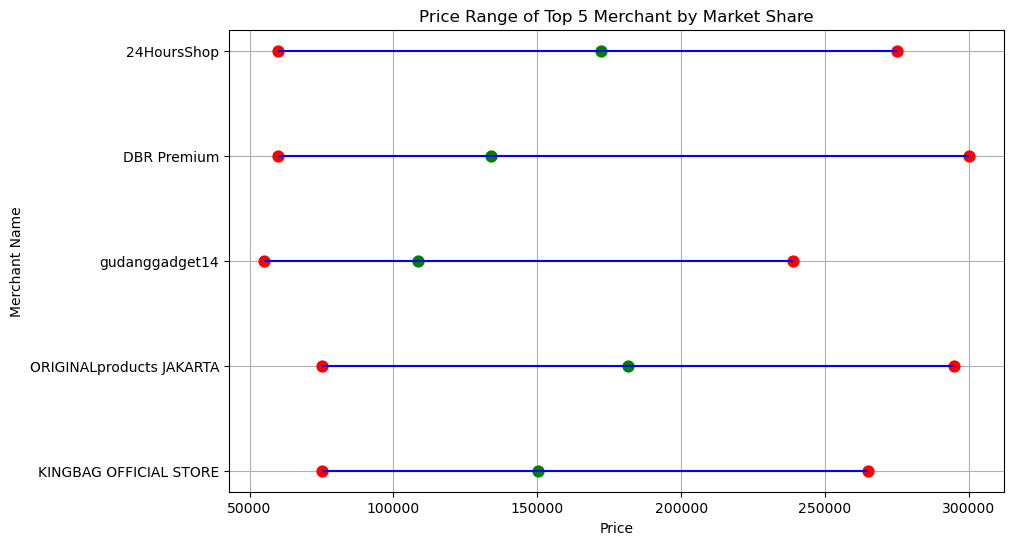

In [103]:
# Plotting Price Range of Top 5 Merchant By Market Share
top_5 = result[:5]

plt.figure(figsize=(10, 6))
sns.pointplot(x=top_5["merchant_price_min"], y=top_5.index, color='red', join=False)
sns.pointplot(x=top_5["merchant_price_max"], y=top_5.index, color='red', join=False)
sns.pointplot(x=top_5["merchant_price_avg"], y=top_5.index, color='green', join=False)
plt.hlines(top_5.index, top_5['merchant_price_min'], top_5['merchant_price_max'], color='blue')


# Customizing the plot
plt.xlabel('Price')
plt.ylabel('Merchant Name')
plt.title('Price Range of Top 5 Merchant by Market Share')
plt.grid(True)

# Show plot
plt.show()


This chart is also available on my Tableau dashboard. Click here: **[TABLEAU DASHBOARD](https://public.tableau.com/app/profile/yogga.prastya.wijaya/viz/TokopediaLaptopSleeveCompetitorAnalysis/Dashboard1?publish=yes)**

💡**Findings**💡

The average price range for the top 5 merchants by market share spans from Rp55,000 to Rp299,900, with an overall average price of Rp153,759.

-------

**3. Text Exploration: Product Description Analysis for Product Development**

After identifying the top merchants by market size, we aim to uncover their unique selling points by analyzing the cleaned product descriptions. We categorize the products based on sales volume: less than 49 units, 50-250 units, 251 or more units, and the top 5 merchants by market share. By examining the most frequently used words in these descriptions, we can visualize patterns and similarities among merchants using bar plots and word clouds.

In [104]:
def word_count(check):
    check=check.str.extractall('([a-zA-Z]+)')
    check.columns=['check']
    b=check.reset_index(drop=True)
    check=b['check'].value_counts()

    word_count = {'word':check.index, 'freq':check.values}
    word_count=pd.DataFrame(word_count)
    word_count.index=word_count['word']
    word_count.drop('word',axis=1,inplace=True)
    word_count.sort_values('freq',ascending=False, inplace=True)

    return word_count

In [105]:
df_word_count_all=word_count(df['description_stem'])
df_word_count_1_49=word_count(df[df["total_sold"]<=49]['description_stem'])
df_word_count_50_250=word_count(df[ (df["total_sold"]>=50) & (df["total_sold"]<=250)]['description_stem'])
df_word_count_251=word_count(df[df["total_sold"]>=251]['description_stem'])

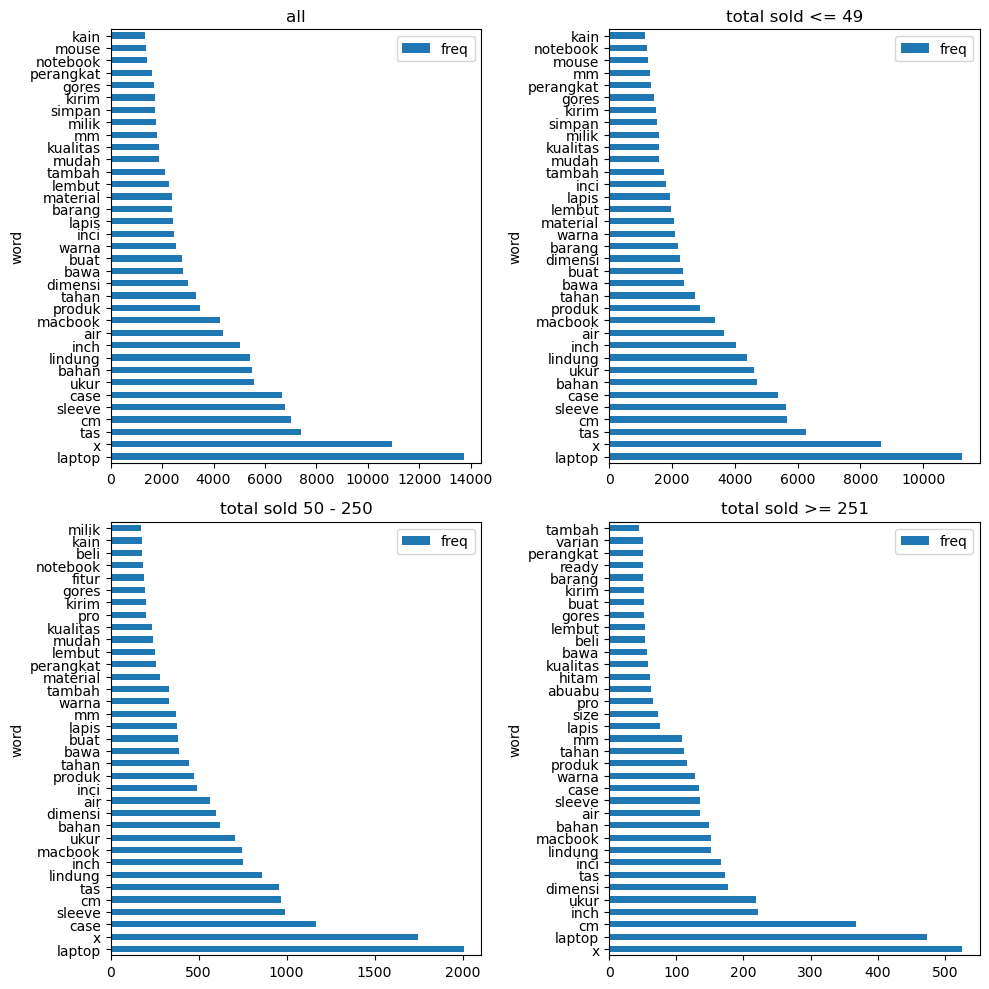

In [106]:
plt.figure(figsize=(24,12))

ax1 = plt.subplot(2,2,1)
plt.title("all")
df_word_count_all[:35].plot(kind='barh',figsize=(10,10),ax=ax1)

ax2 = plt.subplot(2,2,2)
plt.title("total sold <= 49")
df_word_count_1_49[:35].plot(kind='barh',figsize=(10,10),ax=ax2)

ax3 = plt.subplot(2,2,3)
plt.title("total sold 50 - 250")
df_word_count_50_250[:35].plot(kind='barh',figsize=(10,10),ax=ax3)

ax4 = plt.subplot(2,2,4)
plt.title("total sold >= 251")
df_word_count_251[:35].plot(kind='barh',figsize=(10,10),ax=ax4)

plt.tight_layout()
plt.show()

It seems that some common, non-essential keywords such as "laptop," "tas," and "sleeve" were included in the initial analysis. To focus on meaningful words that highlight product features or unique selling points, we have removed these generic terms from the descriptions. We will rerun the analysis to better identify the keywords that truly differentiate the products.

In [107]:
words = ["laptop",
         " tas ",
         "sleeve",
         "perangkat",
         "barang",
         "milik",
         "cocok",
         "buat",
         "bawa",
         "case",
         "simpan",
         "produk"
]

df["clean_description_stem"] = df["description_stem"]

for word in words:
    df["clean_description_stem"] = df["clean_description_stem"].str.replace(word,"")
    
df_word_count_all=word_count(df['clean_description_stem'])
df_word_count_1_49=word_count(df[df["total_sold"]<=49]['clean_description_stem'])
df_word_count_50_250=word_count(df[ (df["total_sold"]>=50) & (df["total_sold"]<=250)]['clean_description_stem'])
df_word_count_251=word_count(df[df["total_sold"]>=251]['clean_description_stem'])

# Get the top 5 merchant names
top_5_merchants = result.head(5).index.values

# Create a regex pattern that matches any of the top 5 merchant names
pattern = '|'.join(top_5_merchants)

# Filter the DataFrame
df_word_count_top_5 = word_count(df[df["merchant_name"].str.contains(pattern)]['clean_description_stem'])

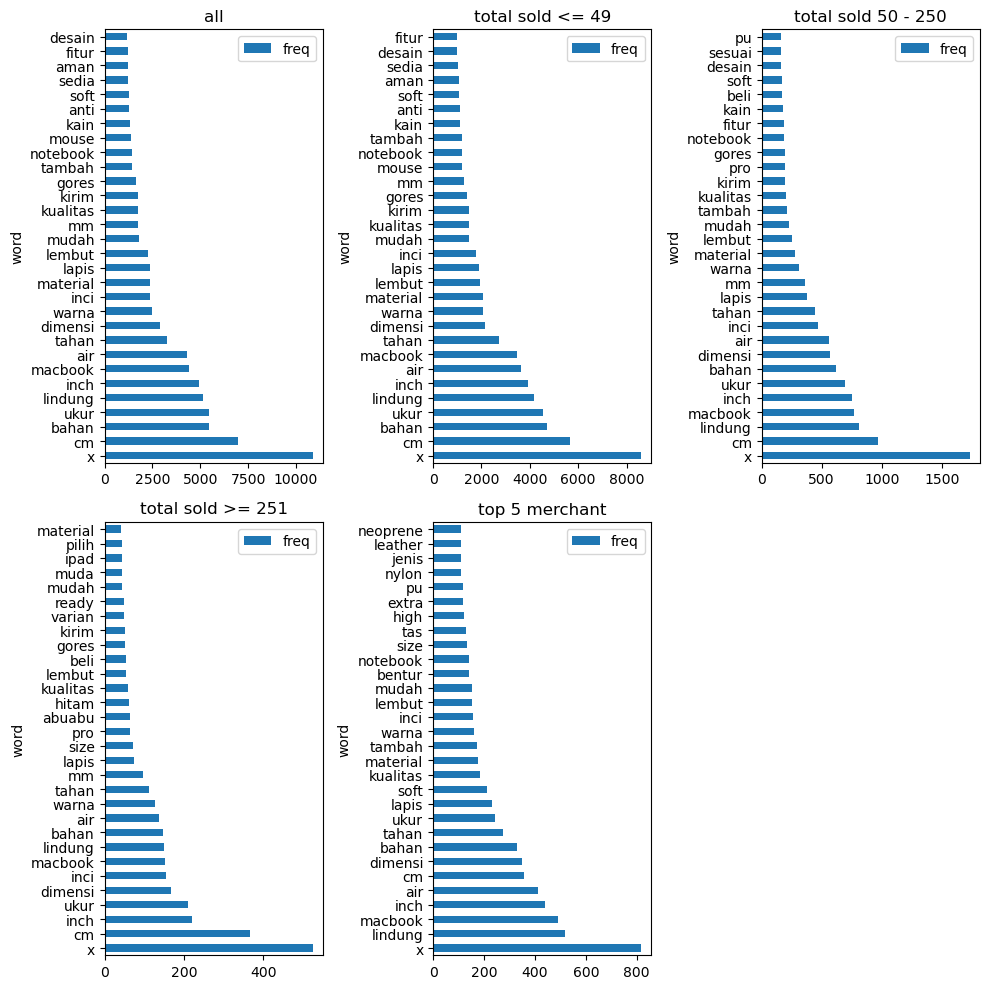

In [108]:
plt.figure(figsize=(24,12))

ax1 = plt.subplot(2,3,1)
plt.title("all")
df_word_count_all[:30].plot(kind='barh',figsize=(10,10),ax=ax1)

ax2 = plt.subplot(2,3,2)
plt.title("total sold <= 49")
df_word_count_1_49[:30].plot(kind='barh',figsize=(10,10),ax=ax2)

ax3 = plt.subplot(2,3,3)
plt.title("total sold 50 - 250")
df_word_count_50_250[:30].plot(kind='barh',figsize=(10,10),ax=ax3)

ax4 = plt.subplot(2,3,4)
plt.title("total sold >= 251")
df_word_count_251[:30].plot(kind='barh',figsize=(10,10),ax=ax4)

ax5 = plt.subplot(2,3,5)
plt.title("top 5 merchant")
df_word_count_top_5[:30].plot(kind='barh',figsize=(10,10),ax=ax5)

plt.tight_layout()
plt.show()

In [109]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud)
    plt.axis('off')

In [110]:
word_cloud=WordCloud(background_color="white").generate(str(df[df["total_sold"]>=251]['clean_description_stem']))

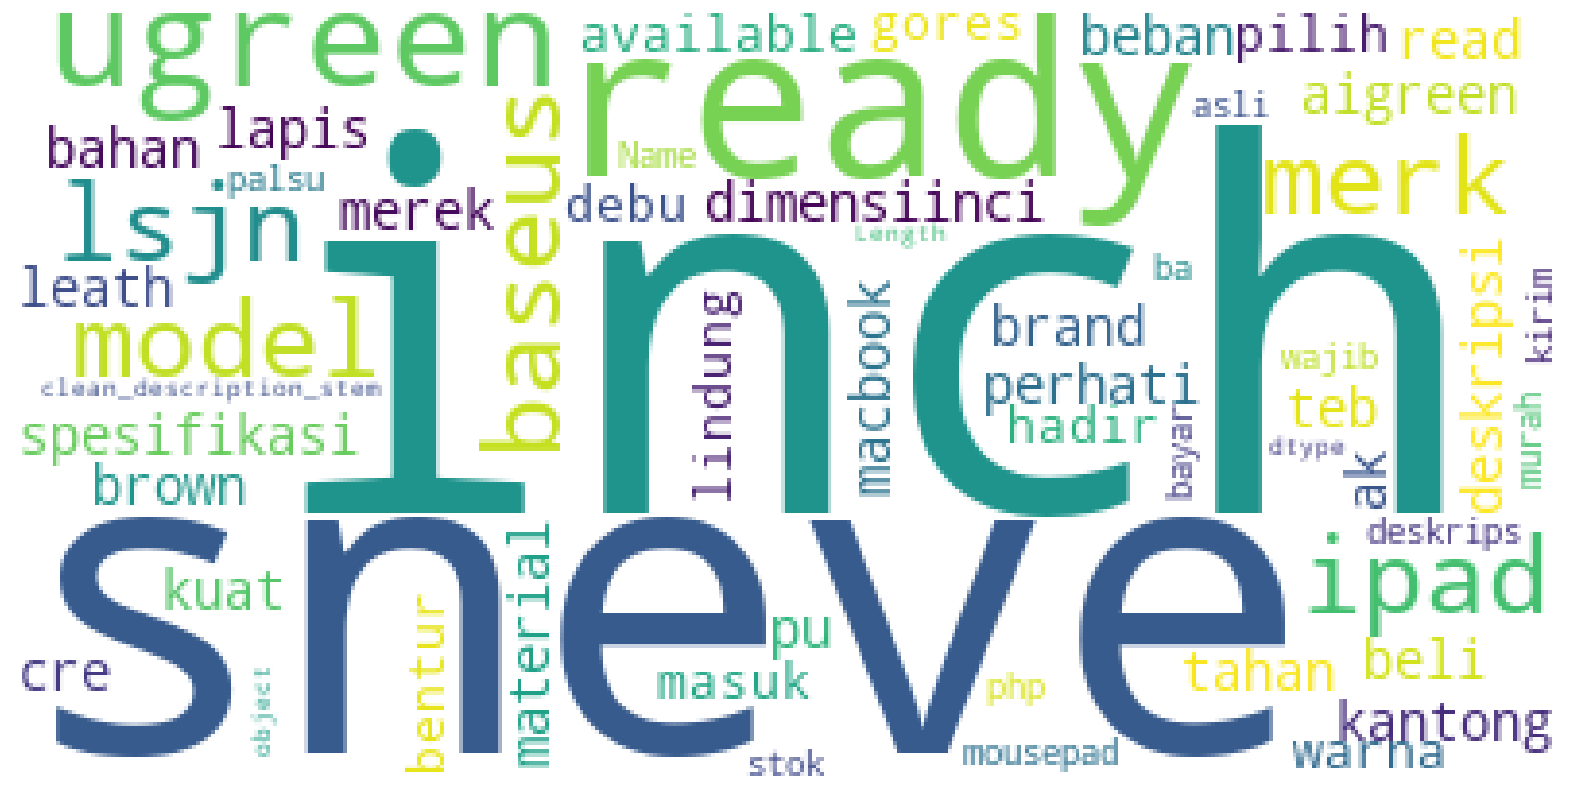

In [111]:
plot_cloud(word_cloud)

💡**Findings**💡

Based on the analysis of the most frequently occurring keywords in product descriptions, the following insights were found:

1. Keywords such as "x," "cm," "inch," "inci," "size," and "mm" indicate product size details.
2. Keywords like "lindung," "lapis," "tahan," "bahan," "material," "lembut," "gores," and "tahan" reflect product qualities such as durability, water resistance, and softness.
3. Keywords including "warna," "hitam," and "abuabu" highlight color variations available for laptop sleeves.
4. Keywords such as "macbook," "air," "pro," and "perangkat" suggest that the laptop sleeves are designed to fit specific devices, particularly MacBook Air and Pro models.

Additionally, the word count bar chart reveals that:

1. The colors "abuabu" (gray) and "hitam" (black) are associated with products that have sold more than 251 units.
2. The ability to accommodate MacBook Air and Pro models is increasingly prominent in products with higher sales volumes.
3. The emphasis on product durability is more pronounced in best-selling items.

In [115]:
keyword = ["abuabu","hitam","lembut","gores","leather","macbook", "(?=.*macbook)(?=.*air)","(?=.*macbook)(?=.*pro)"] 
avg_sold_with_keyword = []
avg_price_with_keyword = []
avg_total_with_keyword = []
count_with = []

avg_sold_without_keyword = []
avg_price_without_keyword = []
avg_total_without_keyword = []
count_without = []

for word in keyword:
    # Calculate avg_sold, avg_price, and avg_total with the keyword
    avg_sold_with = df[df["description_stem"].str.contains(r'{0}'.format(word), case=False, regex=True)]["total_sold"].mean()
    avg_sold_with_keyword.append(avg_sold_with)

    avg_price_with = df[df["description_stem"].str.contains(r'{0}'.format(word), case=False, regex=True)]["price"].mean()
    avg_price_with_keyword.append(avg_price_with)

    avg_total_with_keyword.append(avg_sold_with*avg_price_with)
    count_with.append(len(df[df["description_stem"].str.contains(r'{0}'.format(word), case=False, regex=True)]))
    # Calculate avg_sold, avg_price, and avg_total without the keyword
    avg_sold_without = df[~df["description_stem"].str.contains(r'{0}'.format(word), case=False, regex=True)]["total_sold"].mean()
    avg_sold_without_keyword.append(avg_sold_without)

    avg_price_without = df[~df["description_stem"].str.contains(r'{0}'.format(word), case=False, regex=True)]["price"].mean()
    avg_price_without_keyword.append(avg_price_without)

    avg_total_without_keyword.append(avg_sold_without*avg_price_without)
    count_without.append(len(df[~df["description_stem"].str.contains(r'{0}'.format(word), case=False, regex=True)]))

df_avg_sold = pd.DataFrame({
    "keyword":keyword,
    "avg_sold_with_keyword" :avg_sold_with_keyword,
    "avg_price_with_keyword" :avg_price_with_keyword,
    "avg_total_with_keyword": avg_total_with_keyword,
    "n_with": count_with,
    "avg_sold_without_keyword":avg_sold_without_keyword,
    "avg_price_without_keyword":avg_price_without_keyword,
    "avg_total_without_keyword":avg_total_without_keyword,
    "n_without": count_without
})

#Differences(%)
df_avg_sold["difference_with_vs_without (%)"] = round(((df_avg_sold["avg_total_with_keyword"] - df_avg_sold["avg_total_without_keyword"])/df_avg_sold["avg_total_without_keyword"])*100,2)
df_avg_sold


,keyword,avg_sold_with_keyword,avg_price_with_keyword,avg_total_with_keyword,n_with,avg_sold_without_keyword,avg_price_without_keyword,avg_total_without_keyword,n_without,difference_with_vs_without (%)
0,abuabu,81.596386,172953.596386,1.411239e+07,332,45.326702,175079.235602,7.935764e+06,2865,77.83
1,hitam,55.500000,185353.009202,1.028709e+07,978,46.269491,170233.150518,7.876601e+06,2219,30.60
2,lembut,43.168853,183454.334855,7.919513e+06,1753,56.285319,164423.237535,9.254614e+06,1444,-14.43
3,gores,54.883502,198783.303907,1.090992e+07,1382,44.684298,156641.365289,6.999409e+06,1815,55.87
4,leather,41.163059,222596.347763,9.162747e+06,693,51.287939,161646.699281,8.290526e+06,2504,10.52
5,macbook,51.853951,175526.638147,9.101750e+06,1835,45.373715,173958.313510,7.893135e+06,1362,15.31
6,(?=.*macbook)(?=.*air),57.613737,188005.695716,1.083171e+07,1354,42.833424,165199.615844,7.076065e+06,1843,53.08
7,(?=.*macbook)(?=.*pro),55.957293,155179.833114,8.683443e+06,1522,42.856119,192739.640597,8.260073e+06,1675,5.13


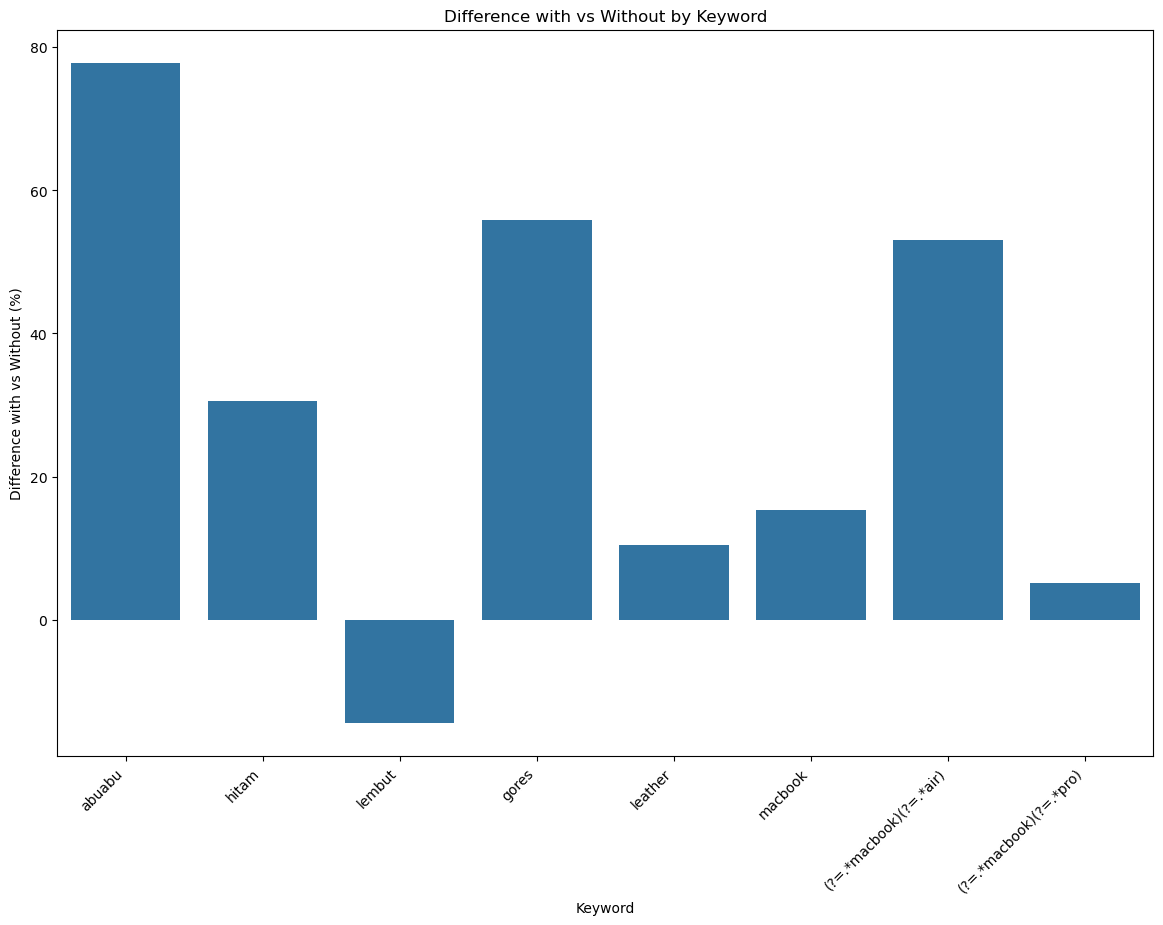

In [194]:
plt.figure(figsize=(12,8))

sns.barplot(df_avg_sold, x="keyword", y="difference_with_vs_without (%)")
plt.tight_layout()

# Rotate x-tick labels
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel("Keyword")
plt.ylabel("Difference with vs Without (%)")
plt.title("Difference with vs Without by Keyword")
plt.show()

💡**Findings**💡

The keyword "abuabu" (which means "grey") appears to have a significant impact on sales, leading to a roughly 75% increase. This suggests that many customers prefer grey-colored laptop sleeves. Similarly, the keywords "gores" and "macbook air" also boost sales by around 55%.

The keyword "gores" can be a bit ambiguous. In some descriptions, it refers to the laptop sleeve's ability to protect the device from scratches, while in others, it indicates that the material of the sleeve itself is scratch-resistant. On the other hand, "macbook air" indicates that the sleeve is specifically designed to fit a MacBook Air.

Other keywords like "hitam" (black), "leather," and "macbook pro" have a more modest impact, improving sales by around 20%. However, the keyword "lembut" (soft) has a slightly negative impact, reducing sales by about 20%.

-----

**4. Text Exploration: Customer Review Analysis**

In this section, we will analyze customer reviews to gain insights into the specific pains and gains experienced by customers when choosing the ideal laptop sleeve. Understanding these factors will help Anyara identify customer needs and preferences, allowing for better product development and improved customer satisfaction.

In [117]:
product_id = []
review_id = []
review = []
for row in range(0,len(df),1):
    list = df["customer_reviews"][row]
    for i in range(0,len(list),1):
        review.append(list[i])
        review_id.append(i)
        product_id.append(row)

reviews=pd.DataFrame({'product_id':product_id,'review_id':review_id,'review':review})
reviews

,product_id,review_id,review
0,2,0,puas belanja disini. untuk pengiriman cepat se...
1,2,1,toppppp..seller nya amanah..barang juga bagus..
2,4,0,"Barang oke, packing rapi, pengiriman cepat. su..."
3,5,0,Apik sekali cover laptopnya. Semoga awet dan m...
4,5,1,"barang bagus, pas tuk lenovo yoga. laptop jd g..."
...,...,...,...
48161,3196,45,bagus banget. pengiriman cepat.
48162,3196,46,barang bagus...mantap...makasih
48163,3196,47,produk sesuai deskripsi dan tersegel..\nrespon...
48164,3196,48,Mantappp


In [118]:
product_id = []
rating_id=[]
rating = []
for row in range(0,len(df),1):
    list = df["customer_ratings"][row]
    for i in range(0,len(list),1):
        rating.append(int(list[i][-1]))
        rating_id.append(i)
        product_id.append(row)

ratings=pd.DataFrame({'product_id':product_id,'rating_id':rating_id,'rating':rating})
ratings

,product_id,rating_id,rating
0,2,0,5
1,2,1,5
2,4,0,5
3,5,0,5
4,5,1,5
...,...,...,...
49539,3196,45,5
49540,3196,46,5
49541,3196,47,5
49542,3196,48,5


In [119]:
merge=ratings.merge(reviews,left_on=["product_id","rating_id"],right_on=["product_id","review_id"])[["product_id","rating","review"]]
merge

,product_id,rating,review
0,2,5,puas belanja disini. untuk pengiriman cepat se...
1,2,5,toppppp..seller nya amanah..barang juga bagus..
2,4,5,"Barang oke, packing rapi, pengiriman cepat. su..."
3,5,5,Apik sekali cover laptopnya. Semoga awet dan m...
4,5,5,"barang bagus, pas tuk lenovo yoga. laptop jd g..."
...,...,...,...
48161,3196,5,bagus banget. pengiriman cepat.
48162,3196,5,barang bagus...mantap...makasih
48163,3196,5,produk sesuai deskripsi dan tersegel..\nrespon...
48164,3196,5,Mantappp


In [121]:
pd.DataFrame(merge["rating"].value_counts())

,count
rating,
5,43702
4,2666
3,976
1,507
2,315


In [122]:
#to lowercase
merge['review1']=merge['review'].apply(to_lower)

#remove number
merge['review2']=merge['review1'].apply(remove_numbers)

#remove punct
merge['review3']=merge['review2'].apply(remove_punct)

#remove ws
merge['review4']=merge['review3'].apply(remove_white_space)

#remove sw indonesian
merge['review5']=merge['review4'].apply(remove_stopwords_ind)

#stemming indonesian
merge['review_stem']=merge['review5'].apply(stem_ind)

merge.head()

,product_id,rating,review,review1,review2,review3,review4,review5,review_stem
0,2,5,puas belanja disini. untuk pengiriman cepat se...,puas belanja disini. untuk pengiriman cepat se...,puas belanja disini. untuk pengiriman cepat se...,puas belanja disini untuk pengiriman cepat sekali,puas belanja disini untuk pengiriman cepat sekali,puas belanja pengiriman cepat,puas belanja kirim cepat
1,2,5,toppppp..seller nya amanah..barang juga bagus..,toppppp..seller nya amanah..barang juga bagus..,toppppp..seller nya amanah..barang juga bagus..,topppppseller nya amanahbarang juga bagus,topppppseller nya amanahbarang juga bagus,topppppseller nya amanahbarang bagus,topppppseller nya amanahbarang bagus
2,4,5,"Barang oke, packing rapi, pengiriman cepat. su...","barang oke, packing rapi, pengiriman cepat. su...","barang oke, packing rapi, pengiriman cepat. su...",barang oke packing rapi pengiriman cepat sukses,barang oke packing rapi pengiriman cepat sukses,barang oke packing rapi pengiriman cepat sukses,barang oke packing rapi kirim cepat sukses
3,5,5,Apik sekali cover laptopnya. Semoga awet dan m...,apik sekali cover laptopnya. semoga awet dan m...,apik sekali cover laptopnya. semoga awet dan m...,apik sekali cover laptopnya semoga awet dan me...,apik sekali cover laptopnya semoga awet dan me...,apik cover laptopnya semoga awet melindungi la...,apik cover laptop moga awet lindung laptop
4,5,5,"barang bagus, pas tuk lenovo yoga. laptop jd g...","barang bagus, pas tuk lenovo yoga. laptop jd g...","barang bagus, pas tuk lenovo yoga. laptop jd g...",barang bagus pas tuk lenovo yoga laptop jd gak...,barang bagus pas tuk lenovo yoga laptop jd gak...,barang bagus pas tuk lenovo yoga laptop jd gak...,barang bagus pas tuk lenovo yoga laptop jd gak...


In [140]:
review_word_count_all=word_count(merge['review_stem'])
review_word_count_negative=word_count(merge[merge["rating"]<=2]['review_stem'])
review_word_count_netral=word_count(merge[merge["rating"]==3]['review_stem'])
review_word_count_positive=word_count(merge[merge["rating"]>=4]['review_stem'])

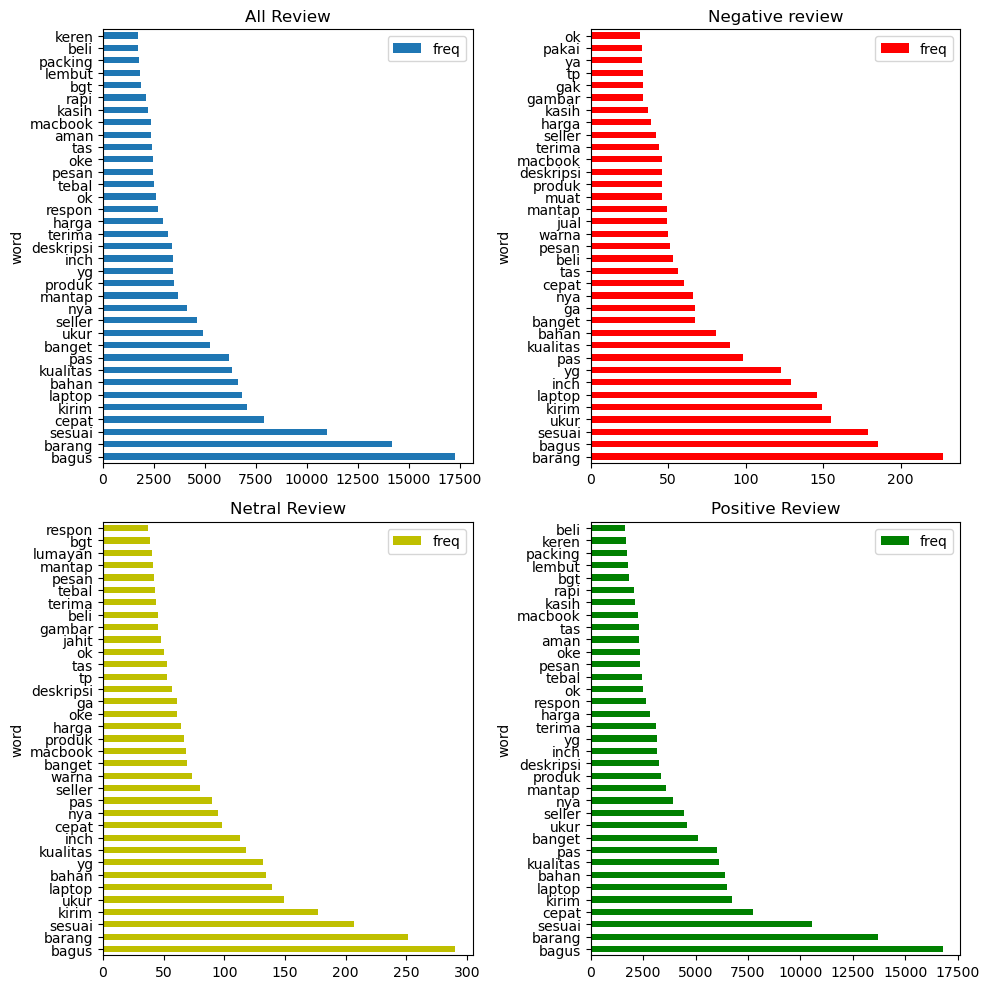

In [148]:
plt.figure(figsize=(24,12))

ax1 = plt.subplot(2,2,1)
plt.title("All Review")
review_word_count_all[:35].plot(kind='barh',figsize=(10,10),ax=ax1)

ax2 = plt.subplot(2,2,2)
plt.title("Negative review")
review_word_count_negative[:35].plot(kind='barh',figsize=(10,10),color='r',ax=ax2)

ax3 = plt.subplot(2,2,3)
plt.title("Netral Review")
review_word_count_netral[:35].plot(kind='barh',figsize=(10,10),color='y',ax=ax3)

ax4 = plt.subplot(2,2,4)
plt.title("Positive Review")
review_word_count_positive[:35].plot(kind='barh',figsize=(10,10),color='g', ax=ax4)

plt.tight_layout()
plt.show()

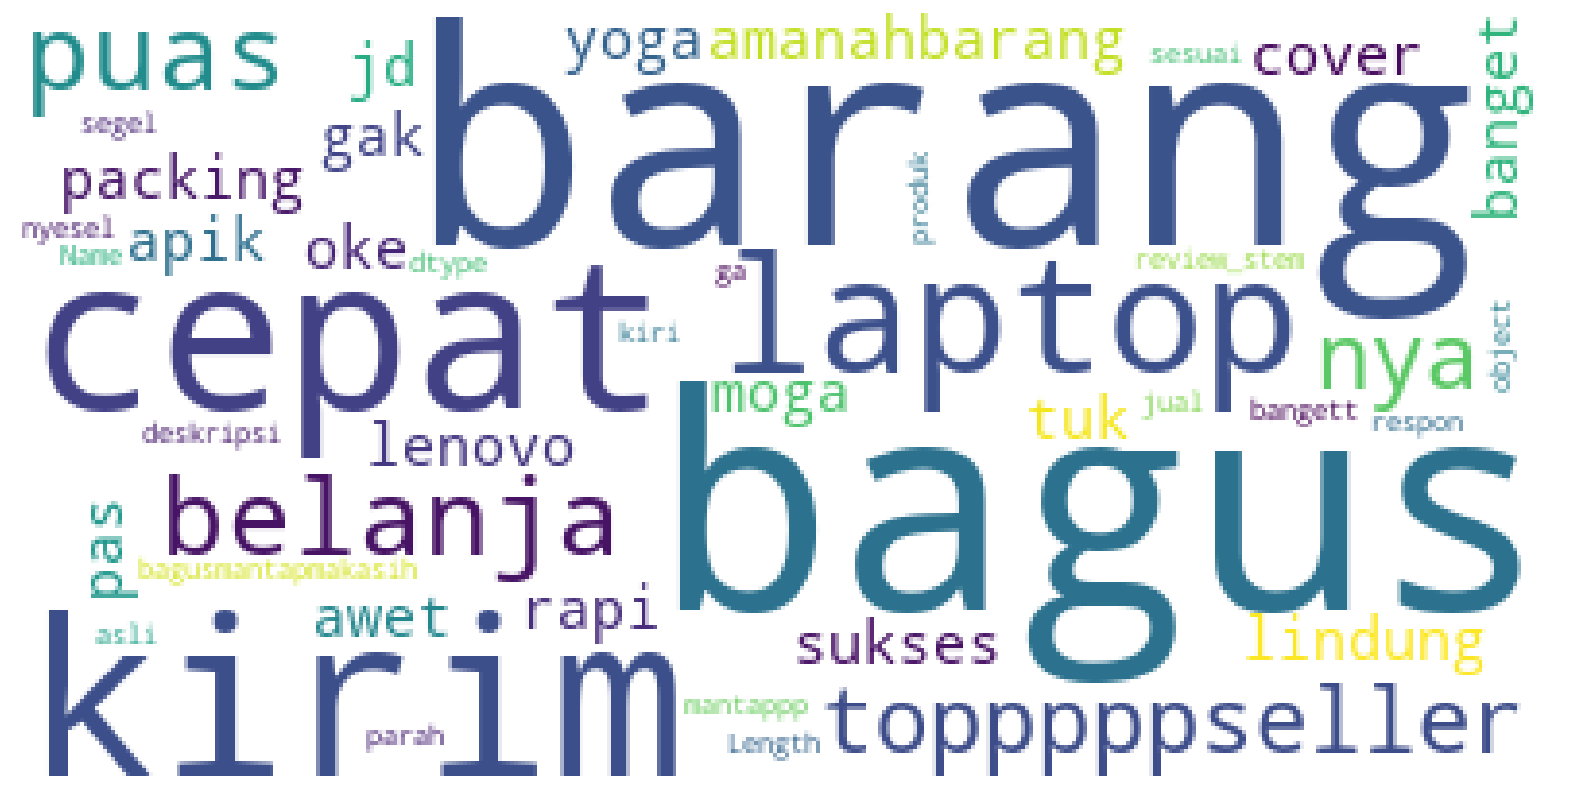

In [158]:
word_cloud=WordCloud(background_color="white").generate(str(merge['review_stem']))
plot_cloud(word_cloud)

In [190]:
words = ["barang"," jd", "gak", "pas", ' yg', ' tp', " ya", " ok", "oke", " bgt", "banget", " utk", " nya"] 

merge["review_stem_clean"] = merge["review_stem"]

for word in words:
    merge["review_stem_clean"] = merge["review_stem_clean"].str.replace(word,"")
    
review_word_count_all=word_count(merge['review_stem_clean'])
review_word_count_negative=word_count(merge[merge["rating"]<=2]['review_stem_clean'])
review_word_count_netral=word_count(merge[merge["rating"]==3]['review_stem_clean'])
review_word_count_positive=word_count(merge[merge["rating"]>=4]['review_stem_clean'])

In [191]:
merge

,product_id,rating,review,review1,review2,review3,review4,review5,review_stem,review_stem_clean
0,2,5,puas belanja disini. untuk pengiriman cepat se...,puas belanja disini. untuk pengiriman cepat se...,puas belanja disini. untuk pengiriman cepat se...,puas belanja disini untuk pengiriman cepat sekali,puas belanja disini untuk pengiriman cepat sekali,puas belanja pengiriman cepat,puas belanja kirim cepat,puas belanja kirim cepat
1,2,5,toppppp..seller nya amanah..barang juga bagus..,toppppp..seller nya amanah..barang juga bagus..,toppppp..seller nya amanah..barang juga bagus..,topppppseller nya amanahbarang juga bagus,topppppseller nya amanahbarang juga bagus,topppppseller nya amanahbarang bagus,topppppseller nya amanahbarang bagus,topppppseller amanah bagus
2,4,5,"Barang oke, packing rapi, pengiriman cepat. su...","barang oke, packing rapi, pengiriman cepat. su...","barang oke, packing rapi, pengiriman cepat. su...",barang oke packing rapi pengiriman cepat sukses,barang oke packing rapi pengiriman cepat sukses,barang oke packing rapi pengiriman cepat sukses,barang oke packing rapi kirim cepat sukses,e packing rapi kirim cepat sukses
3,5,5,Apik sekali cover laptopnya. Semoga awet dan m...,apik sekali cover laptopnya. semoga awet dan m...,apik sekali cover laptopnya. semoga awet dan m...,apik sekali cover laptopnya semoga awet dan me...,apik sekali cover laptopnya semoga awet dan me...,apik cover laptopnya semoga awet melindungi la...,apik cover laptop moga awet lindung laptop,apik cover laptop moga awet lindung laptop
4,5,5,"barang bagus, pas tuk lenovo yoga. laptop jd g...","barang bagus, pas tuk lenovo yoga. laptop jd g...","barang bagus, pas tuk lenovo yoga. laptop jd g...",barang bagus pas tuk lenovo yoga laptop jd gak...,barang bagus pas tuk lenovo yoga laptop jd gak...,barang bagus pas tuk lenovo yoga laptop jd gak...,barang bagus pas tuk lenovo yoga laptop jd gak...,bagus tuk lenovo yoga laptop panas krn cela...
...,...,...,...,...,...,...,...,...,...,...
48161,3196,5,bagus banget. pengiriman cepat.,bagus banget. pengiriman cepat.,bagus banget. pengiriman cepat.,bagus banget pengiriman cepat,bagus banget pengiriman cepat,bagus banget pengiriman cepat,bagus banget kirim cepat,bagus kirim cepat
48162,3196,5,barang bagus...mantap...makasih,barang bagus...mantap...makasih,barang bagus...mantap...makasih,barang bagusmantapmakasih,barang bagusmantapmakasih,barang bagusmantapmakasih,barang bagusmantapmakasih,bagusmantapmakasih
48163,3196,5,produk sesuai deskripsi dan tersegel..\nrespon...,produk sesuai deskripsi dan tersegel..\nrespon...,produk sesuai deskripsi dan tersegel..\nrespon...,produk sesuai deskripsi dan tersegel\nrespon p...,produk sesuai deskripsi dan tersegel respon pe...,produk sesuai deskripsi tersegel respon penjua...,produk sesuai deskripsi segel respon jual kiri...,produk sesuai deskripsi segel respon jual kiri...
48164,3196,5,Mantappp,mantappp,mantappp,mantappp,mantappp,mantappp,mantappp,mantappp


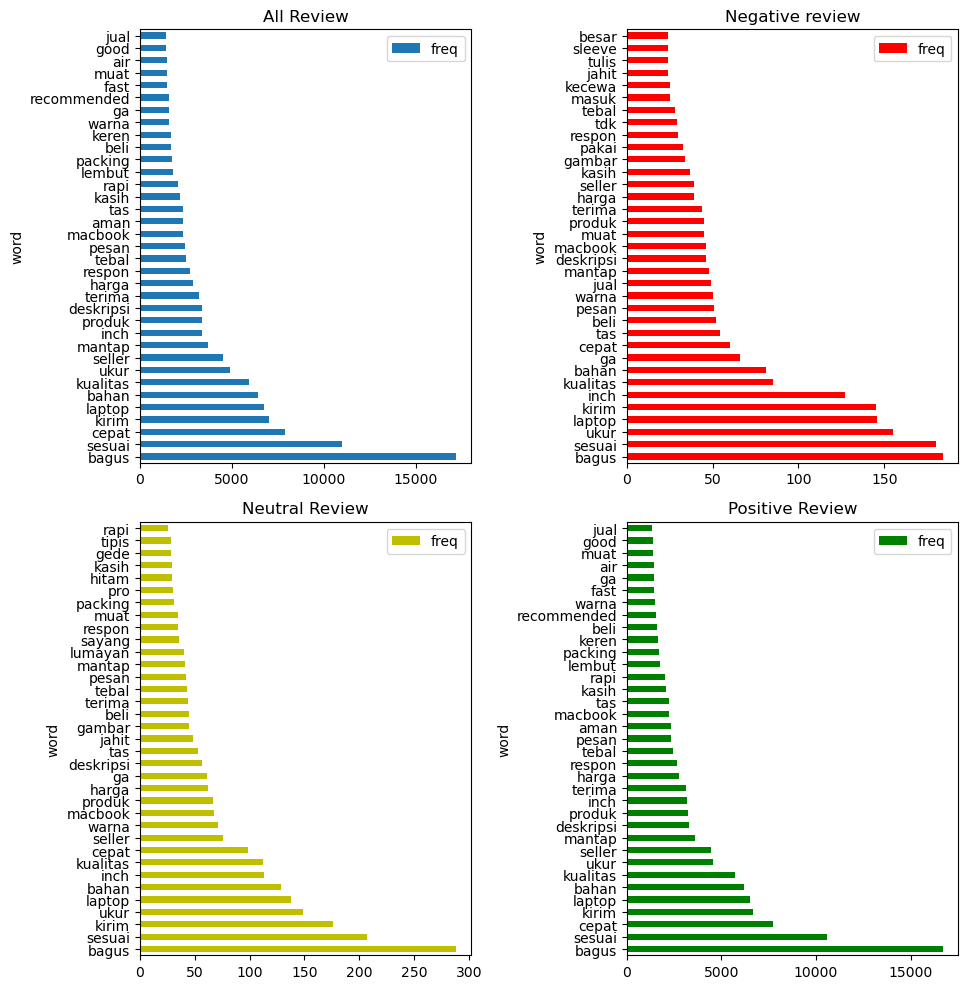

In [193]:
plt.figure(figsize=(24,12))

ax1 = plt.subplot(2,2,1)
plt.title("All Review")
review_word_count_all[:35].plot(kind='barh',figsize=(10,10),ax=ax1)

ax2 = plt.subplot(2,2,2)
plt.title("Negative review")
review_word_count_negative[:35].plot(kind='barh',figsize=(10,10),color='r',ax=ax2)

ax3 = plt.subplot(2,2,3)
plt.title("Neutral Review")
review_word_count_netral[:35].plot(kind='barh',figsize=(10,10),color='y',ax=ax3)

ax4 = plt.subplot(2,2,4)
plt.title("Positive Review")
review_word_count_positive[:35].plot(kind='barh',figsize=(10,10),color='g', ax=ax4)

plt.tight_layout()
plt.show()

💡**Findings**💡

From a customer's perspective, the most valued aspects are:

- Speed and security of delivery (including proper packaging)
- Prompt seller response
- Accuracy in quality (no defects, neat stitching, true-to-color) and size that fits the laptop
- Consistency between product images and descriptions with the actual product

## CONCLUSION & RECOMMENDATION

**Conclusion**

The analysis of Tokopedia's laptop sleeve market highlights a clear relationship between pricing and market share. Merchants with average prices below the market average of Rp178,380 tend to capture higher market shares, while those with higher prices are limited to around 1.55% market share. Additionally, product descriptions and keywords such as "grey," "scratch-resistant," and "MacBook Air" significantly boost sales. Conversely, terms like "soft" may negatively impact sales. Customer reviews further emphasize the importance of fast and secure delivery, accurate product quality, and consistency between product descriptions and actual products.


**Recommendations**

**Pricing Strategy:** Merchants with higher-than-average prices should consider enhancing product value through unique features, quality improvements, or better branding to justify the premium cost. Alternatively, they could consider adjusting prices closer to the market average to increase market share.

**Product Differentiation:** Merchants with competitive pricing should explore ways to differentiate their products, such as offering additional features or emphasizing quality, while maintaining affordability to capture a larger market share.

**Keyword Optimization:** Focus on incorporating high-impact keywords like "grey," "scratch-resistant," and "MacBook Air" in product descriptions to align with customer preferences and drive sales.

**Customer Experience Improvement:** Prioritize improving key areas valued by customers, such as fast and secure delivery, responsive customer service, and accurate product descriptions. This will enhance customer satisfaction and foster positive reviews, leading to increased sales.